In [4]:
import pyodbc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

connection = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER=DESKTOP-2DJE5C9;DATABASE=DW_AreasGeograficas;Trusted_Connection=yes;')


In [21]:

sQuery = '''
        select TOP 10 iIdTipoAreaGeografica,cGentilicio,iIdContinente from AreasGeograficas
        where iIdContinente is not null and iIdTipoAreaGeografica is not null
        and cGentilicio != '' order by iId
    '''

consulta= pd.read_sql_query(sQuery, connection)
consulta.head()

C:\Users\jesus\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,iIdTipoAreaGeografica,cGentilicio,iIdContinente
0,100,ALEMANA,4
1,100,ANDORRANA,4
2,100,ANGOLESA,1
3,100,DE ANGUILA,2
4,100,DE ANTIGUA Y BARBUDA,2


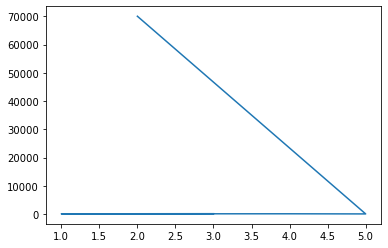

In [29]:
cursor=connection.cursor()
cursor.execute('''select iIdContinente, COUNT(iId) as total
                from AreasGeograficas where iIdContinente is not null
                group by iIdContinente
                ''')
rowsContinente = cursor.fetchall()
continente = []
cantidad = []

for datos in rowsContinente:
    cantidad.append(int(datos[0]))
    continente.append(int(datos[1]))

plt.plot(cantidad,continente)
plt.show()

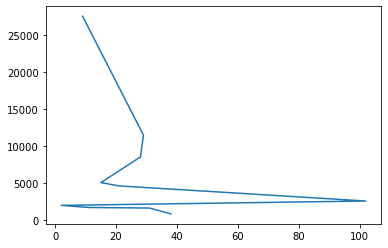

In [34]:
cursor=connection.cursor()
cursor.execute('''select TOP 10 iIdTipoAreaGeografica, COUNT(iId) as total
                from AreasGeograficas where iIdTipoAreaGeografica is not null
                group by iIdTipoAreaGeografica
                order by total desc
                ''')
rowsTipoArea = cursor.fetchall()
cursor.close()
tipoarea = []
cantidadTipo = []

for datos in rowsTipoArea:
    cantidadTipo.append(int(datos[0]))
    tipoarea.append(int(datos[1]))

plt.plot(cantidadTipo,tipoarea)
plt.show()

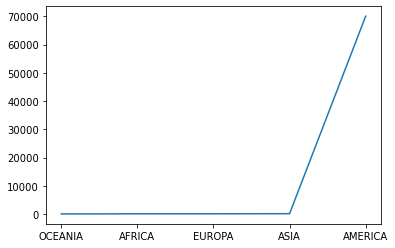

In [36]:
cursor=connection.cursor()
cursor.execute('''select conti.cContinente, COUNT(1) as total
                from AreasGeograficas area inner join Continente conti
                on area.iIdContinente = conti.iIdContinente
                where area.iIdContinente is not null
                group by conti.cContinente
                order by total
                ''')
rowsContinente = cursor.fetchall()
continente = []
cantidad = []

for datos in rowsContinente:
    cantidad.append(str(datos[0]))
    continente.append(int(datos[1]))

plt.plot(cantidad,continente)
plt.show()

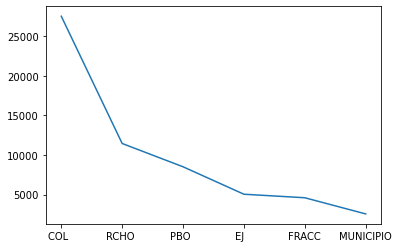

In [43]:
cursor=connection.cursor()
cursor.execute('''select TOP 6 tipo.cNombreCortoAreaGeografica, COUNT(iId) as total
                from AreasGeograficas area inner join TipoAreaGeografica tipo
                on area.iIdTipoAreaGeografica = tipo.iIdTipoAreaGeografica
                where area.iIdTipoAreaGeografica is not null
                group by tipo.cNombreCortoAreaGeografica
                order by total desc
                ''')
rowsTipoArea = cursor.fetchall()
cursor.close()
tipoarea = []
cantidadTipo = []

for datos in rowsTipoArea:
    cantidadTipo.append(str(datos[0]))
    tipoarea.append(int(datos[1]))

plt.plot(cantidadTipo,tipoarea)
plt.show()

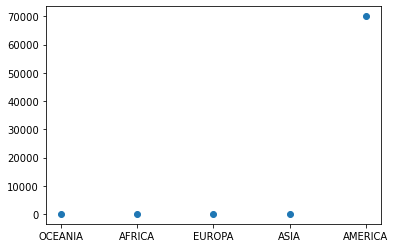

In [44]:
plt.scatter(cantidad,continente)
plt.show()

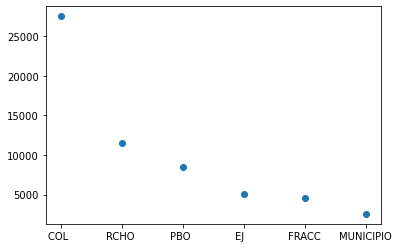

In [46]:
plt.scatter(cantidadTipo,tipoarea)
plt.show()

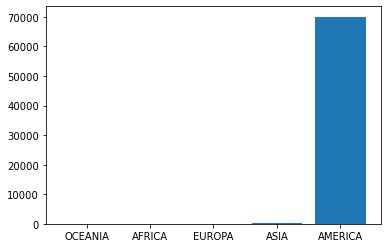

In [49]:
plt.bar(cantidad,continente)
plt.show()

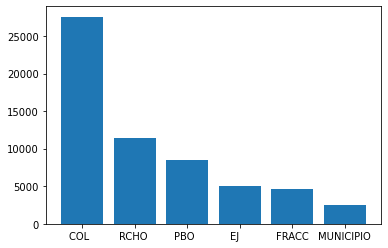

In [50]:
plt.bar(cantidadTipo,tipoarea)
plt.show()

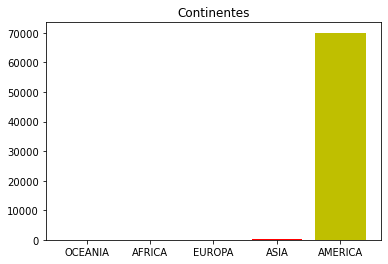

In [56]:
plt.title('Continentes')
plt.bar(cantidad,continente,color=['b','g','c','r','y'])
plt.show()

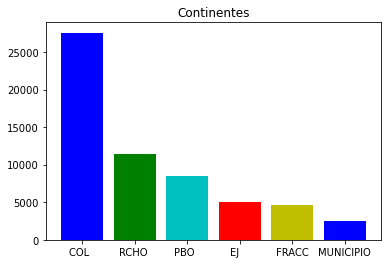

In [57]:
plt.title('Continentes')
plt.bar(cantidadTipo,tipoarea,color=['b','g','c','r','y'])
plt.show()